In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from dsn.util.systems import system_from_str
from dsn.train_dsn import train_dsn
import seaborn as sns
import pandas as pd

In [2]:
system_D = 2;
system_str = 'linear_%dD' % system_D;

behavior_str = 'oscillation';

system_class = system_from_str(system_str);
system = system_class(behavior_str);
print(system.name)

nlayers = 10;
c_init = 1;

linear_2D


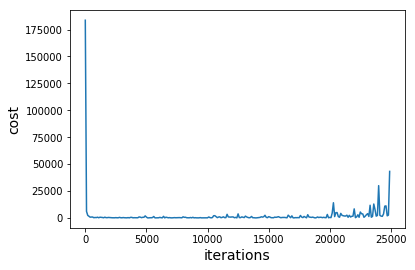

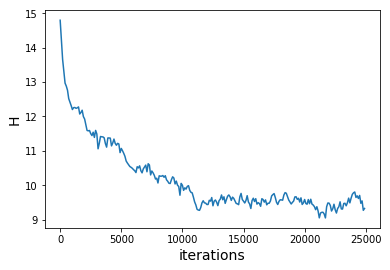

In [6]:
fontsize = 14;
random_seed = 0;
basedir = '/Users/sbittner/Documents/dsn/dsn/results/';
dirstr = 'convergence_testing';
savedir = basedir + dirstr + '/linear_2D_D=4_T=1_flow=M_%dP_lr_order=-3_c=%d_rs=0/' \
                                                                  % (nlayers, c_init);
fname = savedir + 'results.npz';

npzfile = np.load(fname);
check_rate = npzfile['check_rate'];
costs = npzfile['costs'];
Hs = npzfile['Hs'];
mean_T_phis = npzfile['mean_T_phis'];
mu = npzfile['mu'];
behavior = npzfile['behavior'];

phis = npzfile['phis'];
T_phis = npzfile['T_phis'];
log_q_phis = npzfile['log_q_phis'];
last_ind = npzfile['it']//check_rate;
k_max = phis.shape[0]-1;

nits = costs.shape[0];
iterations = np.arange(0, check_rate*nits, check_rate);

plt.plot(iterations[:last_ind], costs[:last_ind]);
plt.xlabel('iterations', fontsize=fontsize);
plt.ylabel('cost', fontsize=fontsize);
plt.show();

plt.plot(iterations[:last_ind], Hs[:last_ind]);
plt.xlabel('iterations', fontsize=fontsize);
plt.ylabel('H', fontsize=fontsize);
plt.show();


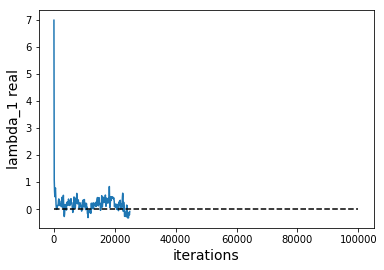

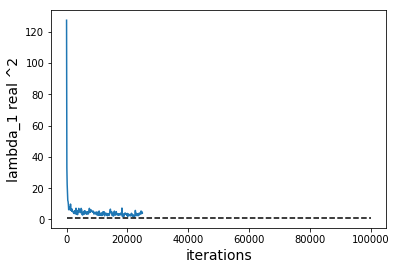

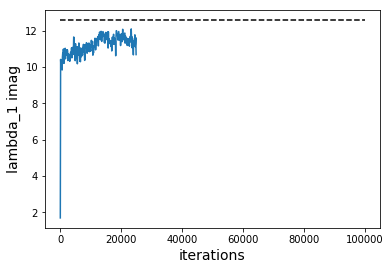

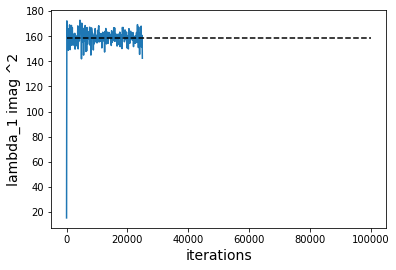

In [7]:
num_suff_stats = mean_T_phis.shape[1];
constraint_names = ['lambda_1 real', 'lambda_1 real ^2', \
                    'lambda_1 imag', 'lambda_1 imag ^2'];
for i in range(num_suff_stats):
    plt.figure();
    plt.plot(iterations[:last_ind], mean_T_phis[:last_ind,i]);
    plt.plot([iterations[0], iterations[-1]], [mu[i], mu[i]], 'k--');
    plt.xlabel('iterations', fontsize=fontsize);
    plt.ylabel(constraint_names[i], fontsize=fontsize);
    plt.show();
plt.show();

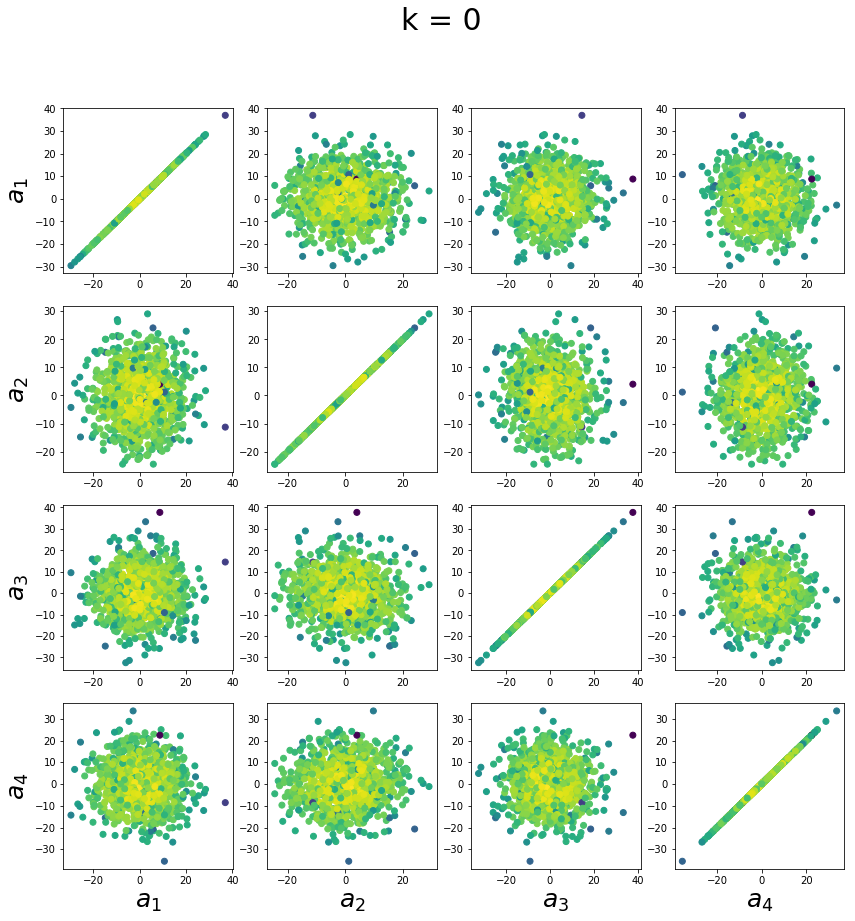

KeyboardInterrupt: 

In [8]:
for k in range(k_max+1):
    fontsize = 25;
    figsize = (14, 14);
    plt.figure(figsize=figsize);
    for i in range(system.D):
        for j in range(system.D):
            ind = system.D*i + j + 1;
            plt.subplot(system.D, system.D, ind);
            plt.scatter(phis[k,:,j], phis[k, :, i], c=log_q_phis[k]);
            if (i==3):
                plt.xlabel(r'$a_%d$' % (j+1), fontsize=fontsize);
            if (j==0):
                plt.ylabel(r'$a_%d$' % (i+1), fontsize=fontsize);
    plt.suptitle('k = %d' % k, fontsize=30);

    plt.show();


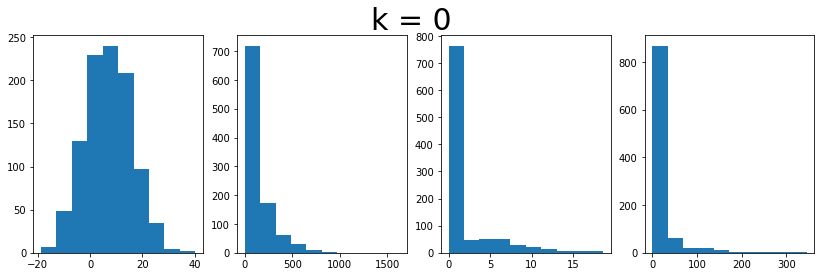

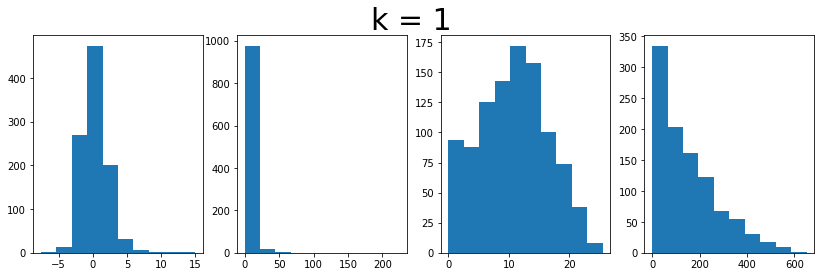

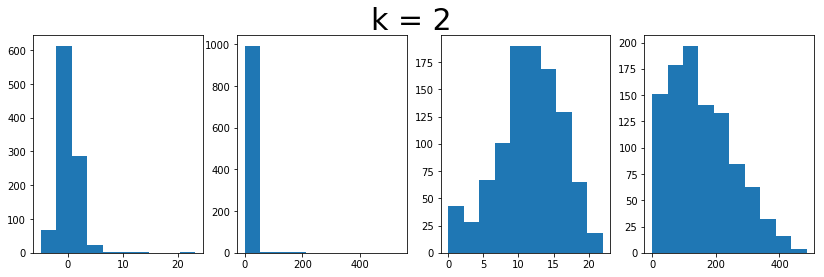

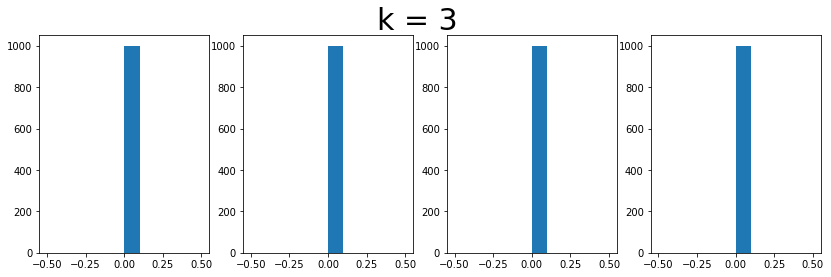

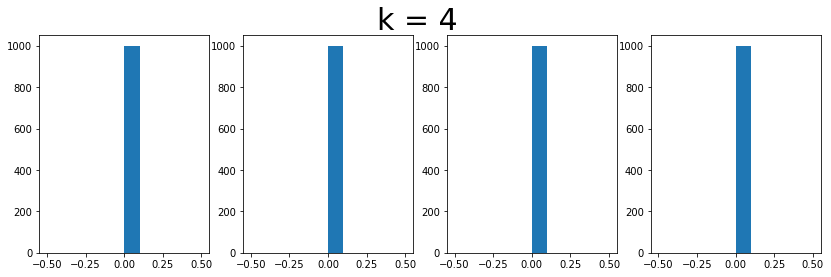

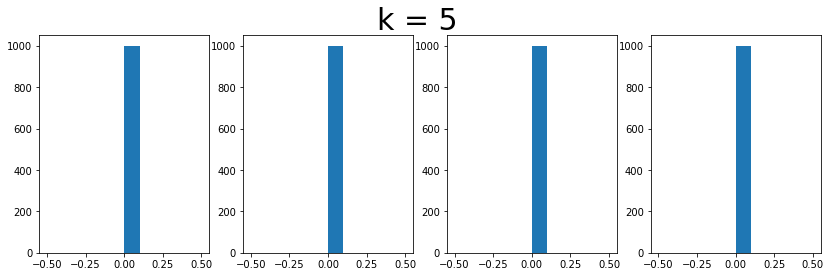

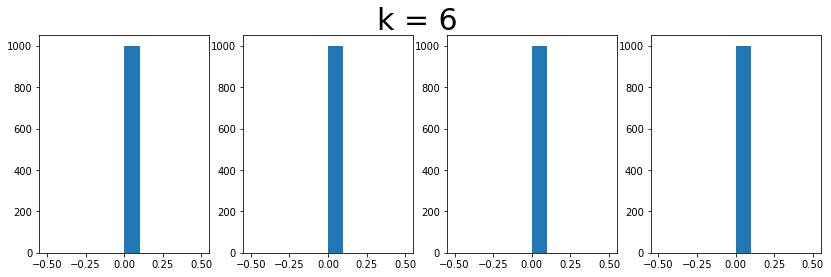

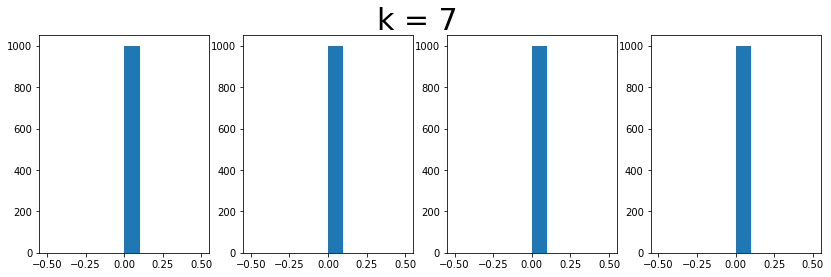

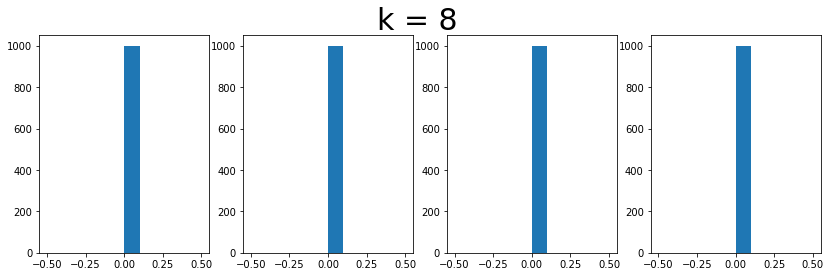

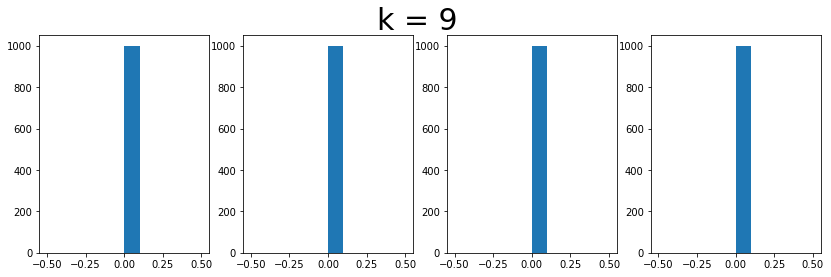

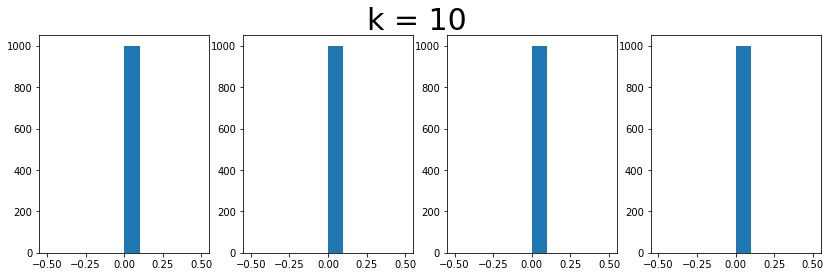

In [9]:
for k in range(k_max+1):
    fontsize = 25;
    figsize = (14, 4);
    plt.figure(figsize=figsize);
    for i in range(system.D):
        plt.subplot(1, system.D, i+1);
        plt.hist(T_phis[k,:,i]);
        #for j in range(system.D):
        #    ind = system.D*i + j + 1;
        #    plt.subplot(system.D, system.D, ind);
        #   plt.scatter(T_phis[k,:,j], T_phis[k, :, i], c=log_q_phis[k]);
        #    if (i==3):
        #        plt.xlabel(r'$a_%d$' % (j+1), fontsize=fontsize);
        #    if (j==0):
        #        plt.ylabel(r'$a_%d$' % (i+1), fontsize=fontsize);
    plt.suptitle('k = %d' % k, fontsize=30);

    plt.show();
